In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Slacker
from slacker import Slacker

# Data manipulation
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2



# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Displaying images
from IPython.display import Image

In [2]:
def get_options(slack):
    command_dict = {'functions': {},
                    'attributes': {}}

    # Modules
    for d in dir(slack):
        if not d.startswith('_'):
            command_dict['functions'][d] = []
            command_dict['attributes'][d] = []
            # Iterate through methods and attributes
            for dd in dir(getattr(slack, d)):
                if not dd.startswith('_'):
                    # List of methods and attributes
                    l = dir(getattr(getattr(slack, d), dd))
                    # Method (function)
                    if '__call__' in l:
                        command_dict['functions'][d].append(dd)
                    # Attributes
                    else:
                        command_dict['attributes'][d].append(dd)
                        
    return command_dict

In [3]:
with open('updogs_token.txt') as f:
    slack_api_token = f.readline()

In [4]:
# Connect to Slack
slack = Slacker(slack_api_token)
if slack.api.test().successful:
    print(
        f"Successfully connected to {slack.team.info().body['team']['name']}.")
else:
    print('Try Again!')

Successfully connected to the updogs.


In [5]:
r = slack.team.info()
r.body

{'ok': True,
 'team': {'id': 'TMK2A7QNP',
  'name': 'the updogs',
  'domain': 'theupdogs',
  'email_domain': '',
  'icon': {'image_34': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-34.png',
   'image_44': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-44.png',
   'image_68': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-68.png',
   'image_88': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-88.png',
   'image_102': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-102.png',
   'image_132': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-132.png',
   'image_230': 'https://a.slack-edge.com/80588/img/avatars-teams/ava_0007-230.png',
   'image_default': True}}}

In [6]:
# from utils import get_data_and_model, get_options
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

command_dict = get_options(slack)
command_dict['functions']['users']
command_dict['functions']['channels']

['get',
 'get_presence',
 'get_user_id',
 'identity',
 'info',
 'list',
 'post',
 'set_active',
 'set_presence']

['archive',
 'create',
 'get',
 'get_channel_id',
 'history',
 'info',
 'invite',
 'join',
 'kick',
 'leave',
 'list',
 'mark',
 'post',
 'rename',
 'replies',
 'set_purpose',
 'set_topic',
 'unarchive']

In [7]:

channels = slack.channels.list().body

In [8]:
channels

{'ok': True,
 'channels': [{'id': 'CT9SH7E59',
   'name': 'airdogs',
   'is_channel': True,
   'created': 1580969600,
   'is_archived': False,
   'is_general': False,
   'unlinked': 0,
   'creator': 'UMWFVLEN4',
   'name_normalized': 'airdogs',
   'is_shared': False,
   'is_org_shared': False,
   'is_member': True,
   'is_private': False,
   'is_mpim': False,
   'members': ['UMK2A7RC3', 'UMLK5358S', 'UMWFVLEN4', 'UMWG1JY69'],
   'topic': {'value': '', 'creator': '', 'last_set': 0},
   'purpose': {'value': 'updogs with airpods',
    'creator': 'UMWFVLEN4',
    'last_set': 1580969601},
   'previous_names': [],
   'num_members': 4},
  {'id': 'CMQT0GA6P',
   'name': 'answers',
   'is_channel': True,
   'created': 1567708818,
   'is_archived': False,
   'is_general': False,
   'unlinked': 0,
   'creator': 'UMWG1JY69',
   'name_normalized': 'answers',
   'is_shared': False,
   'is_org_shared': False,
   'is_member': True,
   'is_private': False,
   'is_mpim': False,
   'members': ['UMYMWBP5L

In [9]:
channels = slack.channels.list().body

# Iterate through channels
for channel in channels['channels']:
    print(
        f"""Channel {channel["name"]}. ID: {channel["id"]}. Purpose: {channel["purpose"]["value"]}\n""")

Channel airdogs. ID: CT9SH7E59. Purpose: updogs with airpods

Channel answers. ID: CMQT0GA6P. Purpose: 

Channel beveragibg. ID: CRN87FH51. Purpose: For misc. drinking, primarily The Campus Drinking Odyssey

Channel btc. ID: CN3PDECTF. Purpose: 

Channel church. ID: CNWA1MRG9. Purpose: Praying

Channel clarifications. ID: CNMEE1UDU. Purpose: if one asks a question and it needs....see title

Channel espm114. ID: CSK6TNVB4. Purpose: espm114

Channel funfacts. ID: CSU1D8UHF. Purpose: 

Channel general. ID: CMWFL4LFP. Purpose: sorry

Channel goodluckonthegre. ID: CNV18UP6Z. Purpose: People in this channel are wished good luck for their GRE

Channel horrorscopes. ID: CS82QJC2X. Purpose: 

Channel jouses. ID: CPDEX7BH7. Purpose: Pictures of our houses when we pass them

Channel kip. ID: CMYBWTQ5V. Purpose: kip

Channel license. ID: CNL1T6FL0. Purpose: Plates

Channel mad. ID: CQ2M2BVAN. Purpose: 

Channel music. ID: CMWRUGPN0. Purpose: we like music

Channel overheard-at-updogs. ID: CQ6QXQHQ

In [28]:
slack.channels.history(channel='CMYBWTQ5V', oldest=0).body


{'ok': True,
 'messages': [{'type': 'message',
   'text': '',
   'files': [{'id': 'FT80W88DR',
     'created': 1580892766,
     'timestamp': 1580892766,
     'name': 'image.png',
     'title': 'image.png',
     'mimetype': 'image/png',
     'filetype': 'png',
     'pretty_type': 'PNG',
     'user': 'UMQU6TAU9',
     'editable': False,
     'size': 28471,
     'mode': 'hosted',
     'is_external': False,
     'external_type': '',
     'is_public': True,
     'public_url_shared': False,
     'display_as_bot': False,
     'username': '',
     'url_private': 'https://files.slack.com/files-pri/TMK2A7QNP-FT80W88DR/image.png',
     'url_private_download': 'https://files.slack.com/files-pri/TMK2A7QNP-FT80W88DR/download/image.png',
     'thumb_64': 'https://files.slack.com/files-tmb/TMK2A7QNP-FT80W88DR-a42cf73e39/image_64.png',
     'thumb_80': 'https://files.slack.com/files-tmb/TMK2A7QNP-FT80W88DR-a42cf73e39/image_80.png',
     'thumb_360': 'https://files.slack.com/files-tmb/TMK2A7QNP-FT80W88D

In [65]:
strangs = []
words = []
for diction in slack.channels.history(channel='CN6M1EEKY', count=1000).body['messages']:
    if not 'bot_id' in diction.keys():
        if not 'subtype' in diction.keys():
            text = diction['text']
            word = text.split(' ')
            for w in word:
                words.append(w)
            text_list = [char for char in text]
            strangs += text_list
                


In [66]:
import pandas
from collections import Counter

In [67]:
bigger = df[df['counts'] > df['counts'].mean()]

<Figure size 1100x1100 with 0 Axes>

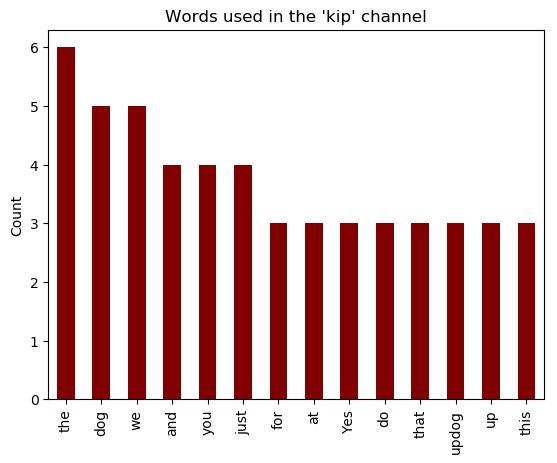

In [71]:
plt.figure(figsize=(11, 11));
plt.style.use('default')
word_counts = Counter(words)
df = pandas.DataFrame.from_dict(word_counts, orient='index', columns=['counts'])
df = df.sort_values(by='counts', ascending=False)
df.iloc[1:15].plot(kind='bar', color='maroon')
plt.title("""Words used in the 'kip' channel""")
plt.ylabel('Count')
legend = plt.legend()
legend.remove();

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

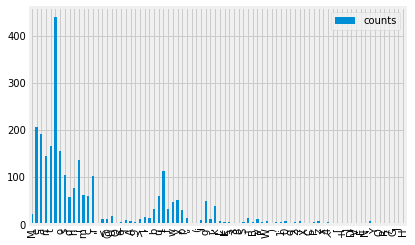

In [13]:
import pandas
from collections import Counter
plt.figure(figsize=(11, 11))
letter_counts = Counter(strangs)
df = pandas.DataFrame.from_dict(letter_counts, orient='index', columns=['counts'])
df.plot(kind='bar')

Text(0.5, 0, 'Letter')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Most common letters yall use')

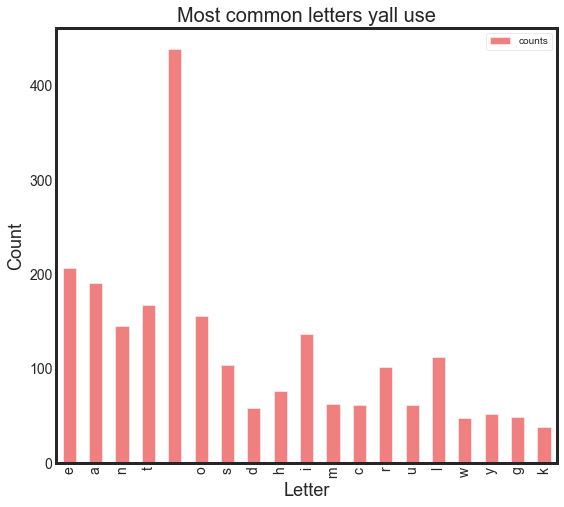

In [16]:
import seaborn as sns
sns.set_style('white')
bigger.plot(kind='bar', color='lightcoral', figsize=(8, 8), fontsize=14)
plt.xlabel('Letter', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Most common letters yall use', fontsize=20)

In [70]:
df

In [33]:
slack.channels.history(channel='CMWFL4LFP').body['messages']


[{'client_msg_id': 'cc07bc69-f404-4ddd-9a97-a0001708cfe8',
  'type': 'message',
  'text': 'F',
  'user': 'UMQU6TAU9',
  'ts': '1567889161.001300',
  'team': 'TMK2A7QNP'},
 {'type': 'message',
  'text': 'i hope yall are ready............',
  'files': [{'id': 'FMSV02JLT',
    'created': 1567889003,
    'timestamp': 1567889003,
    'name': 'Screen Shot 2019-09-07 at 1.42.48 PM.jpg',
    'title': 'Screen Shot 2019-09-07 at 1.42.48 PM.jpg',
    'mimetype': 'image/jpeg',
    'filetype': 'jpg',
    'pretty_type': 'JPEG',
    'user': 'UMWFVLEN4',
    'editable': False,
    'size': 43925,
    'mode': 'hosted',
    'is_external': False,
    'external_type': '',
    'is_public': True,
    'public_url_shared': False,
    'display_as_bot': False,
    'username': '',
    'url_private': 'https://files.slack.com/files-pri/TMK2A7QNP-FMSV02JLT/screen_shot_2019-09-07_at_1.42.48_pm.jpg',
    'url_private_download': 'https://files.slack.com/files-pri/TMK2A7QNP-FMSV02JLT/download/screen_shot_2019-09-07_at_1


User: schawla, Real Name: Sahil, Time Zone: Pacific Standard Time.
Current Status: 


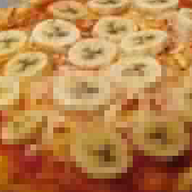


User: justin, Real Name: jas, Time Zone: Pacific Standard Time.
Current Status: 


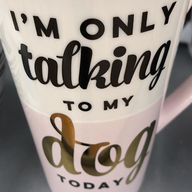

KeyError: 'real_name'

In [79]:
users = slack.users.list().body

for user in users['members']:
    # Print some information
    print(
        f'\nUser: {user["name"]}, Real Name: {user["real_name"]}, Time Zone: {user["tz_label"]}.')
    print(f'Current Status: {user["profile"]["status_text"]}')
    # Get image data and show
    Image(user['profile']['image_192'])

In [ ]:
channel_dict

In [125]:
channel_dict = {}

for channel in channels['channels']:
    channel_dict[channel['name']] = channel['id']

user_dict = {}

for user in users['members']:
    user_dict[user['name']] = user['id']

user_dict

{'schawla': 'UMK2A7RC3',
 'justin': 'UMLK5358S',
 'rosalynn.sarvi': 'UMNK7D5FC',
 'nicks4404': 'UMQU6TAU9',
 'asavel': 'UMWFVLEN4',
 'abittenson': 'UMWG1JY69',
 'ojerram': 'UMWJJ15J4',
 'ketkisamel': 'UMXCP9LPP',
 'rileymcdanal': 'UMYMWBP5L',
 'rtuo': 'UMZRKFG3S',
 'gamemonk': 'UP0QV8GL8',
 'timeguy': 'UPDV44QLC',
 'cjorner': 'UQ8C7070R',
 'slackbot': 'USLACKBOT'}

In [ ]:

# Set the purpose of the channel
r = slack.channels.set_purpose(channel_dict['general'],
                               purpose='sorry')

channels = slack.channels.list().body

# Iterate through channels
for channel in channels['channels']:
    if channel['name'] == 'python_content2':
        print(
            f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]}\n')

In [ ]:
user_dict

In [80]:


r = slack.chat.post_message(channel='general',
                            text='yum yum yum',
                            link_names=True,
                            as_user='UMK2A7RC3'
                            )
r.successful

True

In [81]:
 r = slack.chat.post_message(channel='UMWFVLEN4',
                text='yeet yate yote',
                username='Santa Bot',
                )
r.successful

True

# Secret Santa

In [82]:
users

{'ok': True,
 'members': [{'id': 'UMK2A7RC3',
   'team_id': 'TMK2A7QNP',
   'name': 'schawla',
   'deleted': False,
   'color': '9f69e7',
   'real_name': 'Sahil',
   'tz': 'America/Los_Angeles',
   'tz_label': 'Pacific Standard Time',
   'tz_offset': -28800,
   'profile': {'title': '',
    'phone': '',
    'skype': '',
    'real_name': 'Sahil',
    'real_name_normalized': 'Sahil',
    'display_name': '',
    'display_name_normalized': '',
    'status_text': '',
    'status_emoji': '',
    'status_expiration': 0,
    'avatar_hash': 'b936ebf45da3',
    'image_original': 'https://avatars.slack-edge.com/2019-09-09/756624637974_b936ebf45da3463bd40b_original.png',
    'is_custom_image': True,
    'email': 'schawla@berkeley.edu',
    'first_name': 'Sahil',
    'last_name': '',
    'image_24': 'https://avatars.slack-edge.com/2019-09-09/756624637974_b936ebf45da3463bd40b_24.png',
    'image_32': 'https://avatars.slack-edge.com/2019-09-09/756624637974_b936ebf45da3463bd40b_32.png',
    'image_48':

In [83]:
for user in users['members']:
    print(user['name'])

schawla
justin
rosalynn.sarvi
nicks4404
asavel
abittenson
ojerram
ketkisamel
rileymcdanal
rtuo
gamemonk
timeguy
cjorner
slackbot


In [84]:
santa_names = ['schawla', 'justin', 'nicks4404', 
              'asavel', 'abittenson', 'ojerram',
             'ketkisamel', 'rileymcdanal']

In [85]:
import random

In [86]:
for user in users['members']:
    if user['name'] in santa_names:
        print(user['name'])

schawla
justin
nicks4404
asavel
abittenson
ojerram
ketkisamel
rileymcdanal


In [118]:
matches = santa_names.copy()
random.shuffle(matches) 
for i in range(len(santa_names)):
    if matches[i] == santa_names[i]:
        print('Someone would send themselves a present!')

In [120]:
del matches

In [119]:
for i in range(len(santa_names)):
    to_s = santa_names[i]
    from_s = matches[i]
    from_id = user_dict[from_s]
    r = slack.chat.post_message(channel=from_id,
                    text=f'Your final Secret Santa recipient is {to_s}. heehaw',
                    username='Santa Bot',
                    )
    r.successful

True

True

True

True

True

True

True

True

In [87]:
matches

NameError: name 'matches' is not defined

In [97]:
santa_names

['rileymcdanal',
 'ketkisamel',
 'justin',
 'schawla',
 'nicks4404',
 'abittenson',
 'asavel',
 'ojerram']

In [86]:
random.shuffle(santa_names) 


In [87]:
santa_names

['rileymcdanal',
 'ketkisamel',
 'justin',
 'schawla',
 'nicks4404',
 'abittenson',
 'asavel',
 'ojerram']

In [88]:
matches

['justin',
 'schawla',
 'asavel',
 'nicks4404',
 'abittenson',
 'nicks4404',
 'ojerram',
 'schawla']

In [124]:
user_dict

NameError: name 'user_dict' is not defined

# hedonism week

In [143]:
days = [20, 21, 22, 23, 24, 25, 26, 28]
assignments = santa_names.copy()
random.shuffle(assignments) 
if assignments[7] == 'rileymcdanal':
    print('Riley cannot plan her own birthday!')
else:
    for i in range(len(assignments)):
        day = days[i]
        assign_code = assignments[i]
        assign_id = user_dict[assign_code]
        r = slack.chat.post_message(channel=assign_id,
                        text=f'Your assignment for Hedonism Week is April {day}. Start planning!! \N{smiling face with horns}',
                        username='Hedonism Bot',
                        icon_url='https://ak2.picdn.net/shutterstock/videos/1034782/thumb/1.jpg'
                        )
        r.successful

True

True

True

True

True

True

True

True

In [138]:
day = 123
r = slack.chat.post_message(channel='UMWFVLEN4',
                        text=f'Your assignment for Hedonism Week is April {day}. Start planning!!',
                        username='Hedonism Bot',
                        icon_url='https://ak2.picdn.net/shutterstock/videos/1034782/thumb/1.jpg'
                        )
r.successful

True

In [135]:
 print(u'U+1F608')

U+1F608


In [137]:
print('')


😈
